In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'ner_dataset.csv.gz'
df = pd.read_csv(file_path, compression='gzip', encoding='ISO-8859-1')

print(df.info())

print(df.describe(include='all'))

print(df.head())

num_sentences = df['Sentence #'].nunique()
print(f"Number of sentences: {num_sentences}")

num_words = df['Word'].nunique()
print(f"Number of unique words: {num_words}")

num_pos_tags = df['POS'].nunique()
print(f"Number of unique POS tags: {num_pos_tags}")

num_ner_tags = df['Tag'].nunique()
print(f"Number of unique NER tags: {num_ner_tags}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048565 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB
None
         Sentence #     Word      POS      Tag
count         47959  1048565  1048575  1048575
unique        47959    35177       42       17
top     Sentence: 1      the       NN        O
freq              1    52573   145807   887908
    Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O
Number of sentences: 47959
Number of unique words: 35177
Number of unique POS tags: 42
Number of unique NER tags: 17


In [3]:
df['Sentence #'].fillna(method='ffill', inplace=True)

grouped = df.groupby('Sentence #')['Word'].apply(list)

sentence_lengths = grouped.apply(len)
max_length = sentence_lengths.max()
longest_sentence = sentence_lengths.idxmax()

longest_sentence_words = grouped.loc[longest_sentence]

longest_sentence_text = ' '.join(longest_sentence_words)

print(f"The longest sentence is: {longest_sentence}")
print(f"Number of words in the longest sentence: {max_length}")
print(f"The longest sentence is: {longest_sentence_text}")


The longest sentence is: Sentence: 22480
Number of words in the longest sentence: 104
The longest sentence is: Fisheries in 2006 - 7 landed 1,26,976 metric tons , of which 82 % ( 1,04,586 tons ) was krill ( Euphausia superba ) and 9.5 % ( 12,027 tons ) Patagonian toothfish ( Dissostichus eleginoides - also known as Chilean sea bass ) , compared to 1,27,910 tons in 2005 - 6 of which 83 % ( 1,06,591 tons ) was krill and 9.7 % ( 12,396 tons ) Patagonian toothfish ( estimated fishing from the area covered by the Convention of the Conservation of Antarctic Marine Living Resources ( CCAMLR ) , which extends slightly beyond the Southern Ocean area ) .


In [4]:
min_length = sentence_lengths.min()

shortest_sentence = sentence_lengths.idxmin()
shortest_sentence_words = grouped.loc[shortest_sentence]

shortest_sentence_text = ' '.join(shortest_sentence_words)

print(f"The shortest sentence is: {shortest_sentence}")
print(f"Number of words in the shortest sentence: {min_length}")
print(f"The shortest sentence is: {shortest_sentence_text}")

The shortest sentence is: Sentence: 38917
Number of words in the shortest sentence: 1
The shortest sentence is: ...


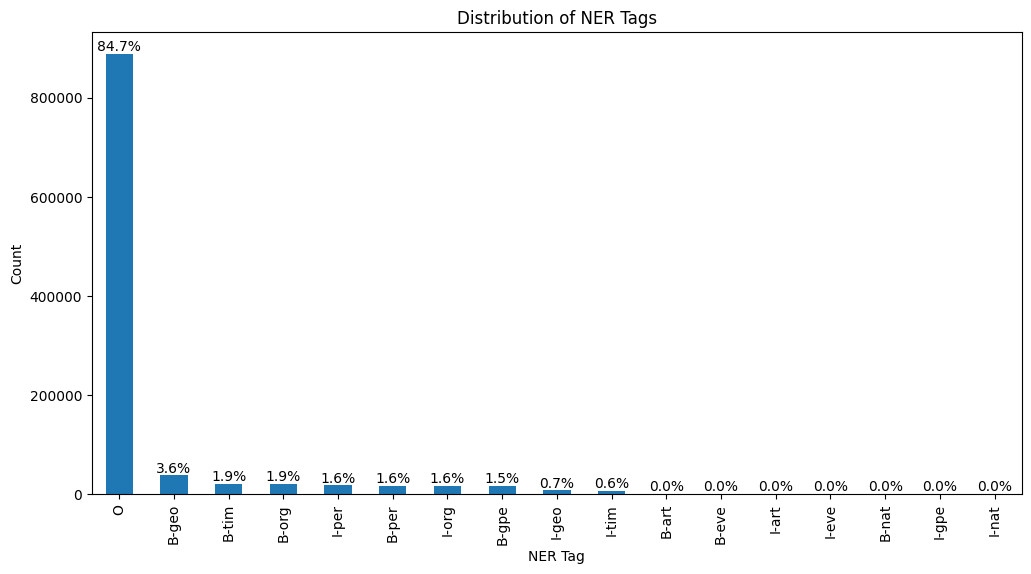

In [18]:
# Display the distribution of NER tags
ner_tag_counts = df['Tag'].value_counts()
total_tags = ner_tag_counts.sum()

plt.figure(figsize=(12, 6))
ax = ner_tag_counts.plot(kind='bar')

for p in ax.patches:
    height = p.get_height()
    percentage = height / total_tags * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Distribution of NER Tags')
plt.xlabel('NER Tag')
plt.ylabel('Count')
plt.show()

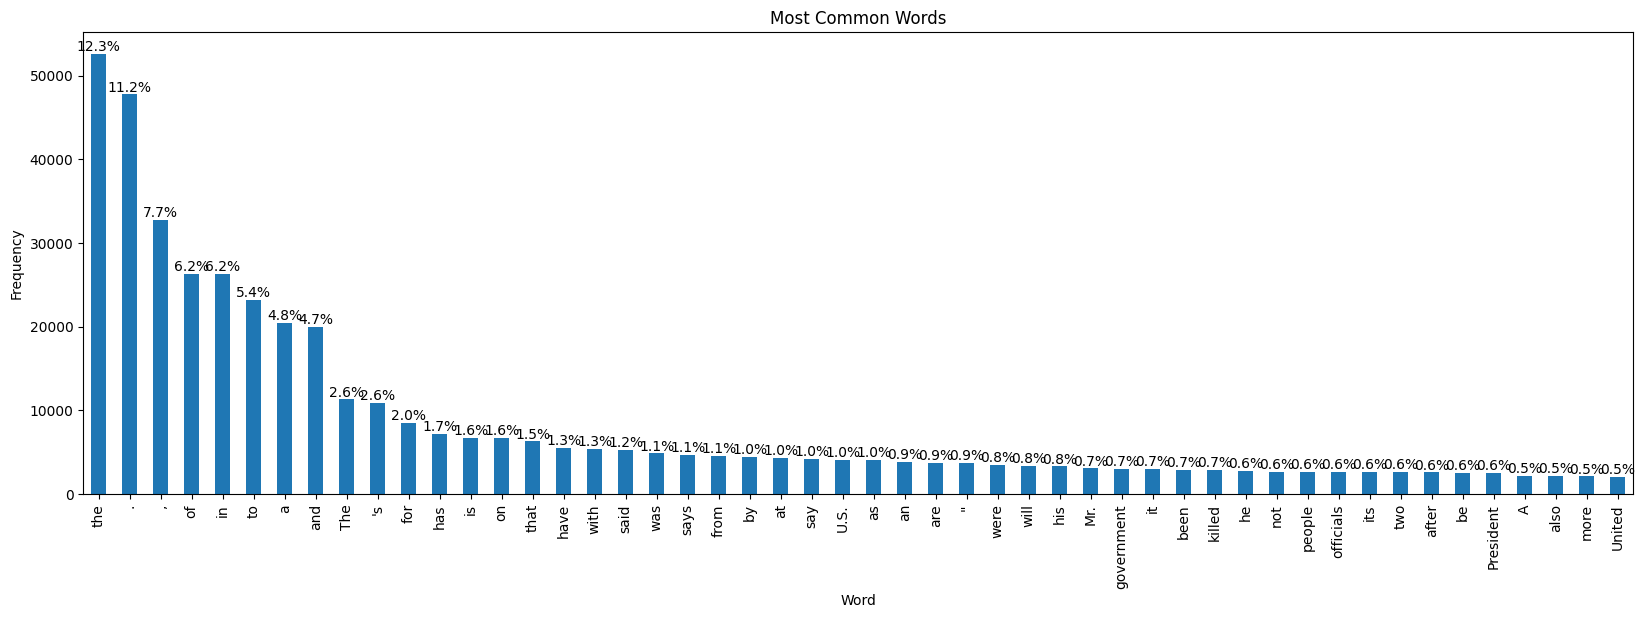

In [32]:
# Display the most common words
common_words = df['Word'].value_counts().head(50)
total_words = common_words.sum()

plt.figure(figsize=(20, 6))
ax = common_words.plot(kind='bar')

for p in ax.patches:
    height = p.get_height()
    percentage = height / total_words * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [13]:
def search_keyword(keyword):
    result = df[df['Word'].str.contains(keyword, case=False, na=False)]

    if not result.empty:
        for index, row in result.iterrows():
            print(f"Sentence #: {row['Sentence #']}, Word: {row['Word']}, Tag: {row['Tag']}")
    else:
        print("Keyword not found in the dataset.")

keyword = "fisheries"
search_keyword(keyword)

Sentence #: Sentence: 17178, Word: fisheries, Tag: O
Sentence #: Sentence: 22480, Word: Fisheries, Tag: O
Sentence #: Sentence: 29827, Word: Fisheries, Tag: I-org
Sentence #: Sentence: 34830, Word: Fisheries, Tag: I-org
Sentence #: Sentence: 37676, Word: fisheries, Tag: O
